In [1]:
import json
import seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['font.sans-serif'] = ['DengXian']  
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
with open('./ec_train_base.json', 'r', encoding='utf8') as train_data:
    ec_base_train = json.load(train_data)
with open('./ec_test_base.json', 'r', encoding='utf8') as test_data:
    ec_base_test = json.load(test_data)
with open('./ec_train_str.json', 'r', encoding='utf8') as train_data:
    ec_str_train = json.load(train_data)
with open('./ec_test_str.json', 'r', encoding='utf8') as test_data:
    ec_str_test = json.load(test_data)
with open('./ec_train_data.json', 'r', encoding='utf8') as train_data:
    ec_geo_train = json.load(train_data)
with open('./ec_test_data.json', 'r', encoding='utf8') as test_data:
    ec_geo_test = json.load(test_data)
tot_num = len(ec_base_train) + len(ec_base_test)

In [3]:
def cnt_1(item_list):
    cnt_list = [0] * 8
    for item in item_list:
        temp = item['class']
        for i, num in enumerate(temp):
            cnt_list[i] += num
    rate_list = [cnt / len(item_list) for cnt in cnt_list]
    return rate_list


def cnt_2(item_lst1, item_lst2):
    cnt_lst1 = [0] * 8
    for item in item_lst1:
        temp = item['class']
        for i, num in enumerate(temp):
            cnt_lst1[i] += num
    cnt_lst2 = [0] * 8
    for item in item_lst2:
        temp = item['class']
        for i, num in enumerate(temp):
            cnt_lst2[i] += num
    rate_list = [np.log(cnt_lst1[i] / cnt_lst2[i] / 6) for i in range(8)]
    return rate_list

In [4]:
cnt_base_tra = cnt_1(ec_base_train)
cnt_str_tra = cnt_1(ec_str_train)
cnt_geo_tra = cnt_1(ec_geo_train)
cnt_base_tes = cnt_1(ec_base_test)
cnt_str_tes = cnt_1(ec_str_test)
cnt_geo_tes = cnt_1(ec_geo_test)
ratio_base = cnt_2(ec_base_train, ec_base_test)
ratio_str = cnt_2(ec_str_train, ec_str_test)
ratio_geo = cnt_2(ec_geo_train, ec_geo_test)

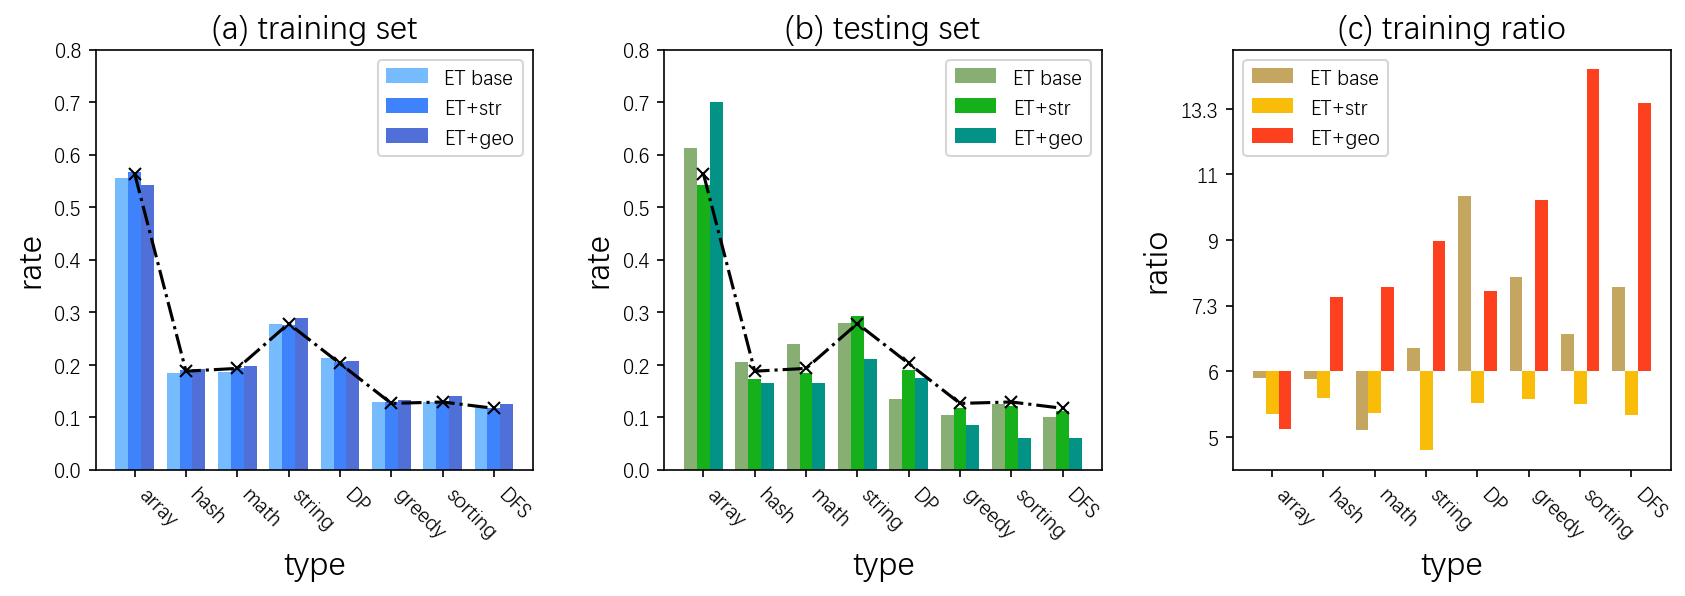

In [8]:
x = np.arange(8)
bar_width = 0.25
tick_label = ['array', 'hash', 'math', 'string', 'DP', 'greedy', 'sorting', 'DFS']
freq_list = [0.5633333333333334, 0.18733333333333332, 0.19266666666666668, 0.278,
             0.202, 0.126, 0.12866666666666668, 0.11666666666666667]
fig = plt.figure(num=1, figsize=(15, 4), dpi=150, clear=True)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, hspace=0.3, wspace=0.3)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

color_list = [['sky blue', 'dodger blue', 'cornflower blue'], ['sage', 'green', 'teal']]
label_list = ['ET base', 'ET+str', 'ET+geo']

ax1.bar(x - 1 * bar_width, cnt_base_tra, bar_width, align="center",
        color=seaborn.xkcd_rgb[color_list[0][0]], tick_label=tick_label, label=label_list[0])
ax1.bar(x + 0 * bar_width, cnt_str_tra, bar_width, align="center",
        color=seaborn.xkcd_rgb[color_list[0][1]], tick_label=tick_label, label=label_list[1])
ax1.bar(x + 1 * bar_width, cnt_geo_tra, bar_width, align="center",
        color=seaborn.xkcd_rgb[color_list[0][2]], tick_label=tick_label, label=label_list[2])
ax1.plot(x, freq_list, marker='x', color="black", ls='-.', lw='1.5')

ax1.set_xticks(x)
ax1.set_xticklabels(tick_label, rotation=-45, ha='left')
ax1.legend(loc='upper right', fontsize=10)
ax1.set_title('(a) training set', fontsize=16)
ax1.set_xlabel("type", fontsize=16)
ax1.set_ylabel("rate", fontsize=16)
ax1.set_ylim((0, 0.8))

ax2.bar(x - 1 * bar_width, cnt_base_tes, bar_width, align="center",
        color=seaborn.xkcd_rgb[color_list[1][0]], tick_label=tick_label, label=label_list[0])
ax2.bar(x + 0 * bar_width, cnt_str_tes, bar_width, align="center",
        color=seaborn.xkcd_rgb[color_list[1][1]], tick_label=tick_label, label=label_list[1])
ax2.bar(x + 1 * bar_width, cnt_geo_tes, bar_width, align="center",
        color=seaborn.xkcd_rgb[color_list[1][2]], tick_label=tick_label, label=label_list[2])
ax2.plot(x, freq_list, marker='x', color="black", ls='-.', lw='1.5')

ax2.set_xticks(x)
ax2.set_xticklabels(tick_label, rotation=-45, ha='left')
ax2.legend(loc='upper right', fontsize=10)
ax2.set_title('(b) testing set', fontsize=16)
ax2.set_xlabel("type", fontsize=16)
ax2.set_ylabel("rate", fontsize=16)
ax2.set_ylim((0, 0.8))

color_list = ['sandy brown', 'golden rod', 'orange red']

ax3.bar(x - 1 * bar_width, ratio_base, bar_width, align="center",
        color=seaborn.xkcd_rgb[color_list[0]], tick_label=tick_label, label=label_list[0])
ax3.bar(x + 0 * bar_width, ratio_str, bar_width, align="center",
        color=seaborn.xkcd_rgb[color_list[1]], tick_label=tick_label, label=label_list[1])
ax3.bar(x + 1 * bar_width, ratio_geo, bar_width, align="center",
        color=seaborn.xkcd_rgb[color_list[2]], tick_label=tick_label, label=label_list[2])

ax3.set_xticks(x)
ax3.set_xticklabels(tick_label, rotation=-45, ha='left')
ax3.legend(loc='upper left', fontsize=10)
ax3.set_title('(c) training ratio', fontsize=16)
ax3.set_xlabel("type", fontsize=16)
ax3.set_ylabel("ratio", fontsize=16)
ax3.set_yticks([-0.2, 0., 0.2, 0.4, 0.6, 0.8])
ax3.set_yticklabels([5, 6, 7.3, 9, 11, 13.3])

plt.savefig('./results/cmp_ec/cmp_ec_sample.jpg')
plt.show()